# Random Forests

The dataset can be found in the link - https://drive.google.com/drive/folders/1NxCh4X7u7wVo5aHojxjLNs9wC7B7zJhb?usp=sharing

In [1]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
# read in the data and display the first 5 rows:
data = pd.read_csv('hmeq-preprocessed.csv')
display(data.head())

,bad_loan,loan_request,amt_due_on_mort,value_of_property,years_at_job,num_derog_reports,num_delinq_lines,oldest_cl_age,num_recent_cl,num_of_cl,debt_to_inc_ratio,reason_for_loan_DebtCon,reason_for_loan_HomeImp,occupation_Mgr,occupation_Office,occupation_Other,occupation_ProfExe,occupation_Sales,occupation_Self
0,1.0,-1.563111,-1.092273,-1.119977,0.204896,-0.287802,-0.390777,-1.010801,-0.105982,-1.245799,0.100426,0,1,0,0,1,0,0,0
1,1.0,-1.545527,-0.083958,-0.611919,-0.263303,-0.287802,1.444855,-0.689082,-0.693180,-0.749574,0.100426,0,1,0,0,1,0,0,0
2,1.0,-1.527943,-1.374281,-1.506102,-0.664616,-0.287802,-0.390777,-0.365411,-0.105982,-1.146554,0.100426,0,1,0,0,1,0,0,0
3,0.0,-1.510359,0.549123,0.142169,-0.798387,-0.287802,-0.390777,-1.022905,-0.693180,-0.749574,0.100426,0,1,0,1,0,0,0,0
4,1.0,-1.510359,-0.985310,-1.097579,0.004239,-0.287802,-0.390777,-0.927646,-0.105982,-1.345045,0.362816,0,1,0,0,1,0,0,0


### 1. Get the distribution of the target variable using countplot: `bad_loan`

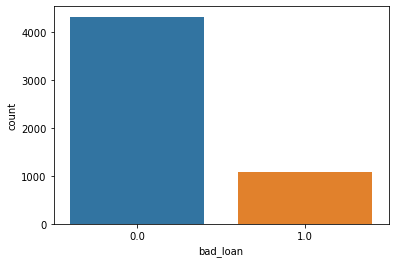

In [3]:
sns.countplot(x='bad_loan', data=data)
plt.show()

In [4]:
# separate target variable from features
X = data.iloc[:, 1:]
y = data.iloc[:, 0]

print(data.shape)
print(X.shape)
print(y.shape)

# partition data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
                                                    X,
                                                    y,
                                                    test_size=0.3,
                                                    stratify=y,
                                                    random_state=42
                                                    )

(5402, 19)
(5402, 18)
(5402,)


### 2. Compute the baseline classification accuracy for `X_train`?
> - HINT: The [DummyClassifier](#https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html) may be helpful.
> - Use the `most_frequent` strategy of calculating the baseline accuracy

In [5]:
#Import Dummy Classifier
from sklearn.dummy import DummyClassifier

In [6]:
dummy_classifier = DummyClassifier(strategy='most_frequent')
dummy_classifier.fit(X_train,y_train)
baseline_acc = dummy_classifier.score(X_test,y_test)


### For verifying answer:
print("Baseline Accuracy = ", baseline_acc)

Baseline Accuracy =  0.7988895743368292


In [7]:
def create_bootstrap_sample(df):
    return df.sample(n= df.shape[0], replace = True)

bootstrap_sample = create_bootstrap_sample(X_train)

print('Number of rows should be the same:')
print('Number of rows in X_train:  ', X_train.shape[0])
print('Number of rows in bootstrap:', create_bootstrap_sample(X_train).shape[0])

print(bootstrap_sample)

Number of rows should be the same:
Number of rows in X_train:   3781
Number of rows in bootstrap: 3781
      loan_request  amt_due_on_mort  value_of_property  years_at_job  \
4483      0.652476        -1.099802          -0.413279     -0.263303   
3788      0.265627        -0.462592          -0.455307      0.138011   
3909      0.327171         0.519119           0.288663      0.004239   
4905      1.153620        -1.161360          -1.045035     -1.065929   
2538     -0.261894        -0.095480          -0.242225     -1.065929   
...            ...              ...                ...           ...   
3767      0.256835        -0.192255          -0.750422     -0.263303   
5061      1.645973        -0.920513          -0.562073     -0.664616   
432      -1.026799        -1.325522          -1.108995     -0.397074   
2862     -0.147597        -1.409646           1.145314      1.743264   
3416      0.098579         1.991105           1.733364     -0.530845   

      num_derog_reports  num_del

### Random Forest

> "Random Forests is a substantial modification of bagging that builds a large collection of _de-correlated_ trees, and averages them."

When constructing a tree within a bagging ensemble, all input features are considered to determine the best split. If the data contains one or two dominant features, those dominant features are always selected first in every tree within the ensemble, resulting in a high correlation among the trees.

The Random Forest algorithm further reduces the model error due to variance by de-correlating each tree within the ensemble. This is acheived by considering only a sample of features from the available feature set at each split in the decision tree. This procedure results in a higher diversity of trees within the ensemble, which can reduce the overall variance.

In [8]:
from sklearn.metrics import (
    classification_report,
    recall_score,
    precision_score,
    accuracy_score
)

from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=10, max_features=7, random_state=42)
model_rf.fit(X_train, y_train)
predict_rf = model_rf.predict(X_test)
recall_rf = recall_score(y_test, predict_rf)
precision_rf = precision_score(y_test, predict_rf)

In [9]:
from sklearn.metrics import (
    classification_report,
    recall_score,
    precision_score,
    accuracy_score
)
print('Classification Report:\n')
print(classification_report(y_test, predict_rf))

Classification Report:

              precision    recall  f1-score   support

         0.0       0.91      0.96      0.94      1295
         1.0       0.82      0.64      0.72       326

    accuracy                           0.90      1621
   macro avg       0.86      0.80      0.83      1621
weighted avg       0.89      0.90      0.89      1621



In [10]:
def print_recall_scores(ensemble, feats, true_labels):
    '''
    Prints the recall scores for base estimators in a sklearn ensemble model.
    '''
    scores = []
    for model_idx, model in enumerate(ensemble.estimators_):
        if model_idx == 0:
            print('='*40)
        preds = model.predict(feats)
        scores.append(recall_score(true_labels, preds))
        model_recall = np.round(recall_score(true_labels, preds), 5)
        print(f'Recall for Base Model {model_idx+1}:\t', model_recall)
        if model_idx < (len(ensemble.estimators_) - 1):
            print('-'*40)
        else:
            print('='*40)
    ensemble_preds = ensemble.predict(feats)
    print("Mean Recall Score:\t\t", np.round(np.array(scores).mean(), 5))
    print("Std Deviation:\t\t\t", np.round(np.array(scores).std(), 5))
    print("Range:\t\t\t\t", np.round(np.array(scores).ptp(), 5))
    print(f'Overall Recall for model:\t {np.round(recall_score(y_test, ensemble_preds), 5)}')

In [11]:
def print_recall_scores(ensemble, feats, true_labels):
    '''
    Prints the recall scores for base estimators in a sklearn ensemble model.
    '''
    scores = []
    for model_idx, model in enumerate(ensemble.estimators_):
        if model_idx == 0:
            print('='*40)
        preds = model.predict(feats)
        scores.append(recall_score(true_labels, preds))
        model_recall = np.round(recall_score(true_labels, preds), 5)
        print(f'Recall for Base Model {model_idx+1}:\t', model_recall)
        if model_idx < (len(ensemble.estimators_) - 1):
            print('-'*40)
        else:
            print('='*40)
    ensemble_preds = ensemble.predict(feats)
    print("Mean Recall Score:\t\t", np.round(np.array(scores).mean(), 5))
    print("Std Deviation:\t\t\t", np.round(np.array(scores).std(), 5))
    print("Range:\t\t\t\t", np.round(np.array(scores).ptp(), 5))
    print(f'Overall Recall for model:\t {np.round(recall_score(y_test, ensemble_preds), 5)}')

In [12]:
print_recall_scores(model_rf, X_test, y_test)

Recall for Base Model 1:	 0.63804
----------------------------------------
Recall for Base Model 2:	 0.65031
----------------------------------------
Recall for Base Model 3:	 0.64724
----------------------------------------
Recall for Base Model 4:	 0.63804
----------------------------------------
Recall for Base Model 5:	 0.60123
----------------------------------------
Recall for Base Model 6:	 0.6319
----------------------------------------
Recall for Base Model 7:	 0.64724
----------------------------------------
Recall for Base Model 8:	 0.59509
----------------------------------------
Recall for Base Model 9:	 0.68098
----------------------------------------
Recall for Base Model 10:	 0.61963
Mean Recall Score:		 0.63497
Std Deviation:			 0.02376
Range:				 0.08589
Overall Recall for model:	 0.63804


Next create another `RandomForestClassifier` model using `X_train`, but 
this time setting the `oob_score` parameter to `True`. You will then compare the 
oob accuracy score to the accuracy of the model on `X_test`.
> - Instantiate and fit a `RandomForestClassifier` model to `X_train`.
Use the following constructor arguments: `n_estimators=100`, `max_features=7`, `oob_score=True`, and `random_state=42`

In [13]:
from sklearn.ensemble import RandomForestClassifier

model_rf_oob = RandomForestClassifier(n_estimators=100, max_features=7, oob_score=True, random_state=42).fit(X_train, y_train)
oob_score = round(model_rf_oob.oob_score_,4)
acc_oob = round(accuracy_score(y_test, model_rf_oob.predict(X_test)),4)
diff_oob = round(abs(oob_score - acc_oob),4)

print('OOB Score:\t\t\t', oob_score)
print('Testing Accuracy:\t\t', acc_oob)
print('Acc. Difference:\t\t', diff_oob)

OOB Score:			 0.9127
Testing Accuracy:		 0.9155
Acc. Difference:		 0.0028


In [19]:
#Feature Importance
feature_importances = model_rf.feature_importances_
features = X_train.columns
df = pd.DataFrame({'features': features, 'importance': feature_importances})
print(df)

                   features  importance
0              loan_request    0.075351
1           amt_due_on_mort    0.069732
2         value_of_property    0.074060
3              years_at_job    0.061340
4         num_derog_reports    0.076399
5          num_delinq_lines    0.099279
6             oldest_cl_age    0.102369
7             num_recent_cl    0.032601
8                 num_of_cl    0.078266
9         debt_to_inc_ratio    0.279206
10  reason_for_loan_DebtCon    0.006666
11  reason_for_loan_HomeImp    0.006930
12           occupation_Mgr    0.006902
13        occupation_Office    0.007598
14         occupation_Other    0.008467
15       occupation_ProfExe    0.005364
16         occupation_Sales    0.004561
17          occupation_Self    0.004909


In [20]:
df.sort_values("importance",ascending=False)

,features,importance
9,debt_to_inc_ratio,0.279206
6,oldest_cl_age,0.102369
5,num_delinq_lines,0.099279
8,num_of_cl,0.078266
4,num_derog_reports,0.076399
0,loan_request,0.075351
2,value_of_property,0.074060
1,amt_due_on_mort,0.069732
3,years_at_job,0.061340
7,num_recent_cl,0.032601
